Homework 11: PARKING TICKETS

Data is here: https://www.dropbox.com/s/4cbpwdcd802av1z/11-homework-data.zip?dl=0 [ www.dropbox.com/s/4cbpwdcd802av1z/11-homework-data.zip?dl=0 ]

Read this: http://iquantny.tumblr.com/post/144197004989/the-nypd-was-systematically-ticketing-legally

And the then we can take a peek at some data on parking. After you've cleaned up the data as instructed below, feel free to browse in other directions than the ones I say. When fixing up the data, you'll probably making a lot of use of date parsing and .apply.

1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.
4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.
5. "Violation time" is... not a time. Make it a time.
6.  There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.
7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.
8. How much money did NYC make off of parking violations?
9. What's the most lucrative kind of parking violation? The most frequent?
10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?
11. Make a chart of the top few.
12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.
13. What's the average ticket cost in NYC?
14. Make a graph of the number of tickets per day.
15. Make a graph of the amount of revenue collected per day.
16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.
17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [562]:
import pandas as pd
import numpy as np
from dateutil import parser
from time import strptime
from time import mktime
from datetime import datetime
import math
import matplotlib.pyplot
%matplotlib inline

In [342]:
def timefixer(time):
    return_time=time
    return_time.replace('+', '0')
    if time == 'nan':
        return np.nan
    if time[0:2]=='00':
        hour='12'
        rest=time[2:]
        return_time=hour+rest
    #strptime(row, '%I%M%p')
    try:
        return strptime(return_time, '%I%M%p')
    except:
        return np.nan

In [346]:
violations_df=pd.read_csv('violations.csv', nrows=100000)

/home/sean/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,29,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [347]:
violations_df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

I want to make sure my Plate ID is a string. Can't lose the leading zeroes!

In [348]:
type(violations_df['Plate ID'][0])

str

I don't think anyone's car was built in 0AD. Discard the '0's as NaN.

In [349]:
violations_df['Vehicle Year']=violations_df['Vehicle Year'].apply(lambda row: row if row!=0 else np.nan)

In [350]:
violations_df['Vehicle Year'].head()

0    2013.0
1    2012.0
2       NaN
3    2010.0
4    2012.0
Name: Vehicle Year, dtype: float64

I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [351]:
violations_df['Issue Date']=pd.to_datetime(violations_df['Issue Date'])

In [352]:
violations_df['Issue Date'][0]

Timestamp('2013-08-04 00:00:00')

"Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [353]:
violations_df['Date First Observed']=violations_df['Date First Observed'].apply(lambda row: parser.parse(str(row)) if row!=0 else np.nan)

"Violation time" is... not a time. Make it a time.

In [355]:
strptime(thing, '%I%M%p')

time.struct_time(tm_year=1900, tm_mon=1, tm_mday=1, tm_hour=7, tm_min=52, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=-1)

In [356]:
violations_df['Violation Time'].head(1)

0    0752A
Name: Violation Time, dtype: object

In [357]:
violations_df['Violation Time']=violations_df['Violation Time'].apply(lambda row: str(row).replace('A', 'am')).apply(lambda row: str(row).replace('P', 'pm'))

In [358]:
violations_df['Violation Time'].head(1)

0    0752am
Name: Violation Time, dtype: object

In [359]:
np.nan is np.nan

True

In [360]:
violations_df['Violation Time']=violations_df['Violation Time'].apply(lambda row: timefixer(row))

There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [438]:
def colorfixer(color):
    if color in ['BLK', 'BALCK', 'BLACL', 'BK', 'BLCK', 'BLAC']:
        return 'BLACK'
    elif color in ['WH', 'WITE', 'WHT', 'WIHTE', 'W', 'WT', 'WHI', 'WYH', 'WHTE']:
        return 'WHITE'
    elif color in ['GY', 'GR', 'GRY', 'GREY']:
        return 'GRAY'
    elif color in ['GN', 'GRN', 'GREEB']:
        return 'GREEN'
    elif color in ['BR', 'SROWN', 'BN', 'BRW', 'BROW', 'BRN', 'BRWN', 'BRO', 'BWN']:
        return 'BROWN'
    elif color=='RD':
        return 'RED'
    elif color in ['BLU', 'BL', 'BLE', 'B LUE']:
        return 'BLUE'
    elif color=='TN':
        return 'TAN'
    elif color in ['YELL', 'YEL', 'YELLO', 'YL', 'YW', 'YELLW', 'YLW']:
        return 'YELLOW'
    elif color in ['ONG', 'ORAN', 'OR', 'ORANG', 'ORG']:
        return 'ORANGE'
    elif color in ['SIL', 'SL', 'SILV', 'SILVE', 'SILVR', 'SIVLE', 'SLVR', 'SLIVE', 'SLV', 'SIV', 'SLR']:
        return 'SILVER'
    elif color in ['GL', 'GLD', 'GD']:
        return 'GOLD'
    elif color in ['PURPL', 'PUR', 'PURP']:
        return 'PURPLE'
    elif color in ['BURGA', 'BURGU', 'BIRG', 'BURG', 'BUR']:
        return 'BURGUNDY'
    elif color in ['MAR', 'MARON', 'MAROO', 'MR']:
        return 'MAROON'
    elif color in ['BG', 'BIEGE']:
        return 'BEIGE'
    else:
        return color
    

In [439]:
violations_df['Vehicle Color']=violations_df['Vehicle Color'].apply(lambda row: colorfixer(row))

In [440]:
violations_df['Vehicle Color'].value_counts()

WHITE       29082
BLACK       16839
GRAY        16531
BROWN        8302
BLUE         7228
RED          5482
SILVER       3607
YELLOW       2080
GREEN        1941
TAN          1925
GOLD          998
ORANGE        303
MAROON        277
OTHER         203
BEIGE         137
BURGUNDY       82
PURPLE         77
LTGY           58
BW             29
WHBL           26
PR             25
G              24
R              23
DKGY           23
B              21
LTG            21
WH/BL          18
DKBL           18
LT-GY          16
UNK            15
            ...  
RD-RD           1
SLV/B           1
TPE             1
BKTN            1
JDE             1
GHTBL           1
SIIL            1
TN/RD           1
WJOTE           1
PL              1
BKE             1
BROWM           1
WHO             1
TNGY            1
BKUE            1
GREW            1
DRK             1
WHWH            1
GR-BL           1
YWGY            1
BAR             1
BI              1
SMOKE           1
TL/GN           1
WT/OR     

Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [441]:
codes_df=pd.read_csv('DOF_Parking_Violation_Codes.csv')

In [442]:
codes_df.columns

Index(['CODE', 'DEFINITION', 'Manhattan  96th St. & below', 'All Other Areas'], dtype='object')

In [443]:
violations_df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [468]:
pd.merge?

In [446]:
codes_df['Violation Code']=codes_df['CODE']

In [480]:
violations_df['CODE']=violations_df['Violation Code'].apply(lambda row: str(row))

In [483]:
df=pd.merge(left=violations_df, right=codes_df, on='CODE')#, how='outer')

In [487]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

How much money did NYC make off of parking violations?

In [499]:
def dollarfixer(amount):
    import re
    dollar=re.search(r'[0-9]+', amount)
    if dollar:
        return int(dollar.group())
    else:
        return 0

In [500]:
dollarfixer('$115')

115

In [501]:
df['ticket cost']=df['Manhattan\xa0 96th St. & below'].apply(lambda row: dollarfixer(row))

In [502]:
df['ticket cost'].sum()

6567120

What's the most lucrative kind of parking violation? The most frequent?

In [513]:
df.groupby(by='DEFINITION')['ticket cost'].sum().sort_values(ascending=False).head(1)

DEFINITION
Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at such locations and during such hours that stopping, standing and parking is allowed when quickly making pickups, deliveries or service calls. This is allowed if there is no parking space or marked loading zone on either side of the street within 100 feet. "Double parking" any type of vehicle is not allowed in Midtown Manhattan (the area from 14th Street to 60th Street, between First Avenue and Eighth Avenue inclusive). Midtown double parking is not allowed between 7:00am  – 7:00pm daily except Sundays. (See Code 47.)    1696710
Name: ticket cost, dtype: int64

In [514]:
df.groupby(by='DEFINITION')['DEFINITION'].count().sort_values(ascending=False).head(1)

DEFINITION
Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at such locations and during such hours that stopping, standing and parking is allowed when quickly making pickups, deliveries or service calls. This is allowed if there is no parking space or marked loading zone on either side of the street within 100 feet. "Double parking" any type of vehicle is not allowed in Midtown Manhattan (the area from 14th Street to 60th Street, between First Avenue and Eighth Avenue inclusive). Midtown double parking is not allowed between 7:00am  – 7:00pm daily except Sundays. (See Code 47.)    14754
Name: DEFINITION, dtype: int64

New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?
Make a chart of the top few.


In [518]:
df[df['Registration State']!='NY']['ticket cost'].sum()

1915625

In [530]:
out_of_state=df[df['Registration State']!='NY'].groupby(by='Registration State')['ticket cost'].sum().sort_values(ascending=False).head(10)

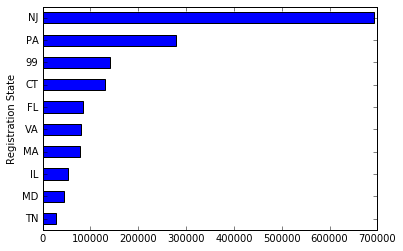

In [532]:
out_of_state.plot(kind='barh').invert_yaxis()

What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.
What's the average ticket cost in NYC?
Make a graph of the number of tickets per day.
Make a graph of the amount of revenue collected per day.
Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.
What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [ ]:
dt = 

In [563]:
df['Violation Time'].apply(lambda x: datetime.fromtimestamp(mktime(x)))#groupby(by=tm_hour)

TypeError: Tuple or struct_time argument required